In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters#for handling timestamp values in plots
register_matplotlib_converters()
import seaborn as sns

In [69]:
df_train=pd.read_csv("train.csv",parse_dates=['datetime'])
df_test=pd.read_csv("test.csv",parse_dates=['datetime'])

In [70]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [71]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [72]:
def convert_datetime(df):
    df['year']=df['datetime'].dt.year
    df['month']=df['datetime'].dt.month
    df['day']=df['datetime'].dt.day
    df['hour']=df['datetime'].dt.hour
    return df

In [73]:
df_train=convert_datetime(df_train)
df_test=convert_datetime(df_test)

In [74]:
df_train.set_index('datetime', inplace=True)
df_test.set_index('datetime', inplace=True)

In [75]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [76]:
df_train['year'].unique()

array([2011, 2012])

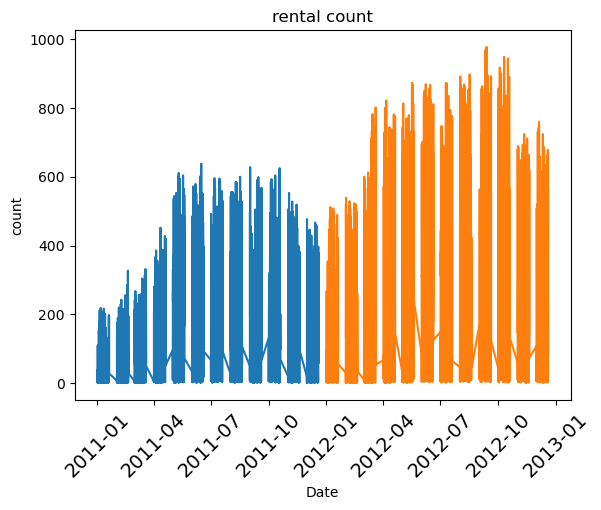

In [85]:
#rental counts for 2011-2012
plt.plot(df_train.loc['2011']['count'])
plt.plot(df_train.loc['2012']['count'])
plt.xticks(fontsize=14,rotation=45)
plt.xlabel('Date')
plt.ylabel('count')
plt.title('rental count')
plt.show()

In [92]:
group_year_month=df_train.groupby(['year','month'])

In [94]:
avg_year_month=group_year_month['count'].mean()

In [104]:
avg_year_month  #multi index dataframe

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

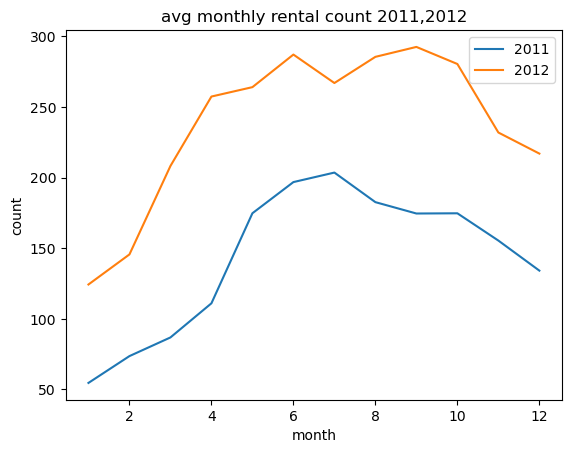

In [102]:
for year in avg_year_month.index.levels[0]:
    plt.plot(avg_year_month[year].index,avg_year_month[year],label=year)
plt.legend()
plt.title("avg monthly rental count 2011,2012")
plt.xlabel('month')
plt.ylabel('count')
plt.show()    

<Axes: >

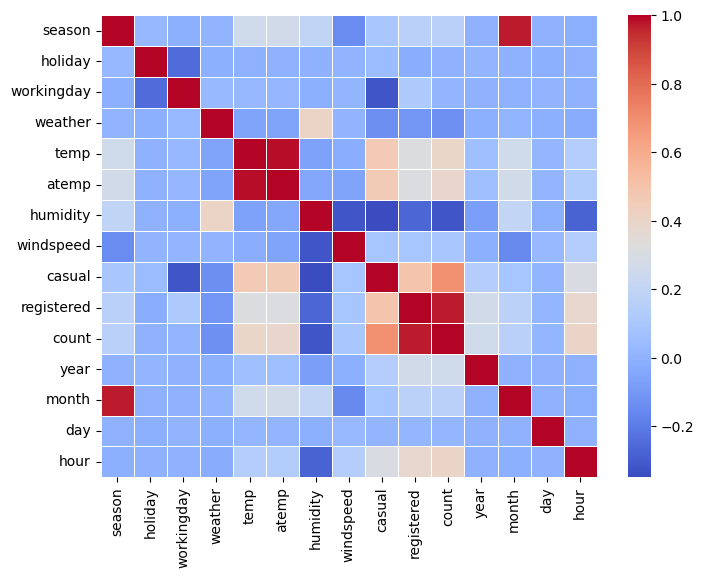

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(),cmap='coolwarm',linewidths=0.5)

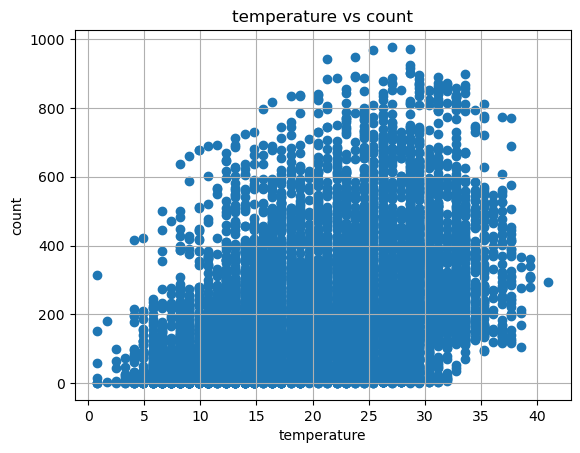

In [126]:
plt.scatter(x=df_train['temp'],y=df_train['count'])
plt.grid(True)
plt.xlabel('temperature')
plt.ylabel('count')
plt.title('temperature vs count')
plt.show()

In [148]:
columns=['count','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered',
         'year','month','day','hour']#target as first column 

In [149]:
#shuffle the data
np.random.seed(5)
l=list(df_train.index)
np.random.shuffle(l)
df_train=df_train.loc[l]

In [150]:
df_train.shape

(10886, 15)

In [151]:
rows=df_train.shape[0]
train=int(0.7*rows)
test=rows-train

In [152]:
#split training set and validation set with no column headers
df_train.iloc[:train].to_csv("bike_train.csv",index=False,header=False,columns=columns)
df_train.iloc[train:].to_csv("bike_validation.csv",index=False,header=False,columns=columns)

In [146]:
#save test data
df_test.to_csv("bike_test.csv",index=True,index_label='datetime')